In [3]:
import pickle
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import matplotlib.pyplot as plt


In [11]:
with open("WESAD/S3/S3_n0.pkl", 'rb') as file:
    data = pickle.load(file, encoding='bytes')
for device in ['wrist', 'chest']:
    for sensor in data[device]:
        print(f'{device}_{sensor}: {data[device][sensor].shape}')


wrist_ACC: (2930, 3, 32)
wrist_BVP: (2930, 1, 64)
wrist_EDA: (2930, 1, 4)
wrist_TEMP: (2930, 1, 4)
chest_ACC: (2930, 3, 700)
chest_ECG: (2930, 1, 700)
chest_EMG: (2930, 1, 700)
chest_EDA: (2930, 1, 700)
chest_Temp: (2930, 1, 700)
chest_Resp: (2930, 1, 700)


In [1]:
# Creating dataframe of all of them
# `window` | `mean` | `std` | `max` | `min` | `label`

from feature import extract_features

extract_features(verbose=1)


Data of S2 loaded!
Data of S3 loaded!
Data of S4 loaded!
Data of S5 loaded!
Data of S6 loaded!
Data of S7 loaded!
Data of S8 loaded!
Data of S9 loaded!
Data of S10 loaded!
Data of S11 loaded!
Data of S13 loaded!
Data of S14 loaded!
Data of S15 loaded!
Data of S16 loaded!
Data of S17 loaded!


In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from training import WESADTrainer
import pandas as pd

subjects = {i for i in range(2, 18)}.difference({12})
trainer = WESADTrainer({
    RandomForestClassifier: 
        {'n_estimators': [100], 'min_samples_leaf': [1]},
    MLPClassifier:
        {},
    
    }, sensor='chest_Resp', subjects=subjects, data_prefix="svd", classes=[2])

reports = trainer.predict_all(verbose=3)


Testing S2
test #S2 skipped

input of size (42069, 6)
Training RandomForestClassifier() completed in 48.474334955215454 secs (score=0.7925797662887943)
Training MLPClassifier() completed in 43.78752422332764 secs (score=0.5353593643641084)
predicting df of size (2889, 5), made (2889,)
Report of S2: {'2': {'precision': 0.8801955990220048, 'recall': 0.5853658536585366, 'f1-score': 0.703125, 'support': 615}, '3': {'precision': 0.8971774193548387, 'recall': 0.9784520668425681, 'f1-score': 0.9360538493899875, 'support': 2274}, 'accuracy': 0.894773277950848, 'macro avg': {'precision': 0.8886865091884217, 'recall': 0.7819089602505523, 'f1-score': 0.8195894246949937, 'support': 2889}, 'weighted avg': {'precision': 0.8935623901043394, 'recall': 0.894773277950848, 'f1-score': 0.886468787993365, 'support': 2889}}
Testing S3
test #S3 skipped

input of size (42023, 6)
Training RandomForestClassifier() completed in 54.44404602050781 secs (score=0.7964324970362877)
Training MLPClassifier() completed 

In [6]:
for item in reports:
    print(f"{item}: {reports[item]}")

1: {'precision': 0, 'recall': 0, 'f1-score': 0}
2: {'precision': 0.6963993299941651, 'recall': 0.7224182369702018, 'f1-score': 0.6893291553323447}
3: {'precision': 0.9210738409342901, 'recall': 0.8945740858623811, 'f1-score': 0.9062676559483119}
4: {'precision': 0, 'recall': 0, 'f1-score': 0}
weighted avg: {'precision': 0.8711524471000265, 'recall': 0.8568923181308491, 'f1-score': 0.8584260810631972}
macro avg: {'precision': 0.8087365854642274, 'recall': 0.8084961614162914, 'f1-score': 0.7977984056403286}
accuracy: 0.8568923181308491


In [10]:
import pickle

with open("WESAD/S3/S3_n0.pkl", "rb") as file:
    s = pickle.load(file, encoding="bytes")

print(s.keys())

dict_keys(['wrist', 'chest', 'label'])


[[1 2 3]
 [4 5 6]
 [7 8 9]]


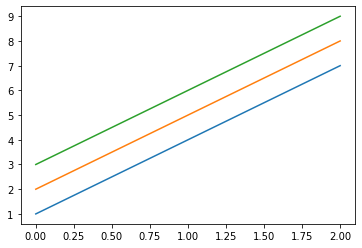

[[1.14462771 1.09206174 1.08438503 1.122349   1.2022375  1.31623047
  1.4531695  1.59965002 1.74133352 1.86435102 1.95666071 2.00922667
  2.01690339 1.97893941 1.89905092 1.78505794 1.64811892 1.50163839
  1.3599549  1.2369374 ]
 [3.47059402 3.41802806 3.41035134 3.44831532 3.52820381 3.64219679
  3.77913581 3.92561634 4.06729983 4.19031733 4.28262702 4.33519299
  4.34286971 4.30490573 4.22501723 4.11102426 3.97408523 3.82760471
  3.68592121 3.56290371]
 [5.79656034 5.74399437 5.73631765 5.77428163 5.85417013 5.9681631
  6.10510212 6.25158265 6.39326615 6.51628364 6.60859333 6.6611593
  6.66883602 6.63087204 6.55098354 6.43699057 6.30005155 6.15357102
  6.01188752 5.88887003]]


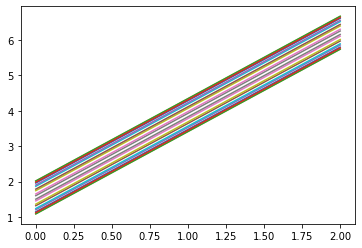

[[0.82063053 1.14888276 1.47713498]
 [0.7568835  1.08513573 1.41338796]
 [0.74757391 1.07582613 1.40407836]
 [0.79361302 1.12186525 1.45011748]
 [0.89049423 1.21874646 1.54699868]
 [1.02873412 1.35698634 1.68523857]
 [1.1948008  1.52305303 1.85130525]
 [1.37243852 1.70069074 2.02894297]
 [1.54425885 1.87251108 2.2007633 ]
 [1.69344282 2.02169505 2.34994728]
 [1.80538728 2.1336395  2.46189173]
 [1.86913431 2.19738653 2.52563876]
 [1.8784439  2.20669613 2.53494836]
 [1.83240478 2.16065701 2.48890924]
 [1.73552358 2.0637758  2.39202803]
 [1.59728369 1.92553592 2.25378814]
 [1.43121701 1.75946923 2.08772146]
 [1.25357929 1.58183152 1.91008374]
 [1.08175896 1.41001119 1.73826341]
 [0.93257498 1.26082721 1.58907944]]


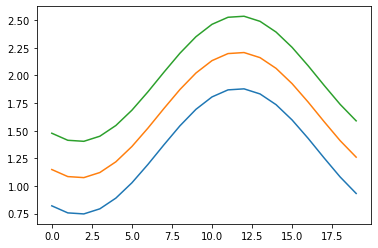

[[1.25364133 2.22900685 3.20437237]
 [0.91083443 1.88619996 2.86156548]
 [0.86077101 1.83613653 2.81150205]
 [1.10835161 2.08371714 3.05908266]
 [1.62934133 2.60470685 3.58007237]
 [2.37274206 3.34810758 4.3234731 ]
 [3.26578455 4.24115007 5.2165156 ]
 [4.22105159 5.19641711 6.17178264]
 [5.14503499 6.12040051 7.09576603]
 [5.9472888  6.92265432 7.89801984]
 [6.54928284 7.52464836 8.50001388]
 [6.89208973 7.86745525 8.84282078]
 [6.94215316 7.91751868 8.8928842 ]
 [6.69457255 7.66993807 8.6453036 ]
 [6.17358284 7.14894836 8.12431388]
 [5.43018211 6.40554763 7.38091315]
 [4.53713961 5.51250514 6.48787066]
 [3.58187257 4.55723809 5.53260362]
 [2.65788918 3.6332547  4.60862022]
 [1.85563537 2.83100089 3.80636641]]


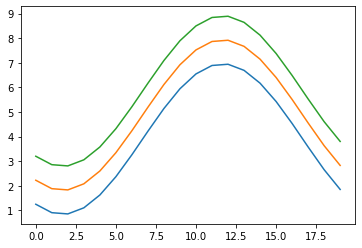

In [4]:
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

sig = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(sig)
plt.plot(sig)
plt.show()
res_sig = resample(sig, 20, window=5, axis=-1)
print(res_sig)
plt.plot(res_sig)
plt.show()

res_sig = resample(sig, 20, window=20)
print(res_sig)
plt.plot(res_sig)
plt.show()

res_sig = resample(sig, 20, window=1)
print(res_sig)
plt.plot(res_sig)
plt.show()


In [1]:
import pickle
import numpy as np

subject = 17
with open(f'WESAD/S{subject}/S{subject}_n0.pkl', 'rb') as pklfile:
    data = pickle.load(pklfile, encoding='bytes')

print(data.keys())
for device in ['wrist', 'chest']:
    for sensor in data[device].keys():
        print(f"{device}_{sensor}: {len(data[device][sensor])}")
print(f"labels: {data['label'].shape}")


arrays = [data[device][sensor].mean((1, 2)).reshape(1, -1) for device in ['wrist', 'chest'] for sensor in data[device].keys()]
print([a.shape for a in arrays])
concated = np.concatenate(arrays)
print(concated.shape)



dict_keys(['wrist', 'chest', 'label'])
wrist_ACC: 3002
wrist_BVP: 3002
wrist_EDA: 3002
wrist_TEMP: 3002
chest_ACC: 3002
chest_ECG: 3002
chest_EMG: 3002
chest_EDA: 3002
chest_Temp: 3002
chest_Resp: 3002
labels: (3002, 700)
[(1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002), (1, 3002)]
(10, 3002)


In [1]:
from biot.BIOT.run_binary_supervised import prepare_WESAD_dataloader_manual

train, test, val = prepare_WESAD_dataloader_manual(batch_size=2)


Len of train: 10, val: 4, test: 1
train size: 5, val size: 2, test size: 1


In [2]:
for item, label in train:
    print(item.shape)
    print(label.shape)
    break


torch.Size([2, 10, 3000])
torch.Size([2, 3000])


In [ ]:
import torch

a = torch.rand([10, 30])
print(a)
print(a.repeat())

<class 'biot.BIOT.utils.WESADLoader'>
Getting 0
0 loaded
In loader: |X|=torch.Size([10, 3006]), |y|=(3006,)
torch.Size([10, 3006])
(3006,)
